# **Phishing Website Detection by Machine Learning Techniques**

In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the data
data0 = pd.read_csv('urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,Prefix/Suffix,Tiny_URL,DNS_Record,Statistical_Report,Web_Traffic,Domain_Age,Domain_End,Subdomain_Count,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,0,0,1,1,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,0,1,0,1,0,0


## **1. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [ ]:
#Checking the shape of the dataset
data0.shape

(3000, 16)

In [ ]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'Prefix/Suffix', 'Tiny_URL',
       'DNS_Record', 'Statistical_Report', 'Web_Traffic', 'Domain_Age',
       'Domain_End', 'Subdomain_Count', 'Label'],
      dtype='object')

In [ ]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [ ]:
data.shape

(3000, 15)

In [ ]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP               0
Have_At               0
URL_Length            0
URL_Depth             0
Redirection           0
https_Domain          0
Prefix/Suffix         0
Tiny_URL              0
DNS_Record            0
Statistical_Report    0
Web_Traffic           0
Domain_Age            0
Domain_End            0
Subdomain_Count       0
Label                 0
dtype: int64

From the above execution, it is clear that the data doesn't have any missing values.

By this, the data is throughly preprocessed and is ready for training.

## **2. Splitting the Data**

In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((3000, 14), (3000,))

# **3. Feature Selection**

In [ ]:
!pip install boruta

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [ ]:
# let's initialize a RF model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

In [ ]:
np.int = np.int32
np.float = np.float64
np.bool = np.bool_

In [ ]:
# define Boruta feature selection method
feat_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(np.array(X), np.array(y))

# check ranking of features
feat_selector.ranking_

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	4
Iteration:

array([6, 3, 1, 1, 4, 6, 1, 2, 1, 6, 1, 1, 1, 1], dtype=int32)

In [ ]:
# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(data.columns,
                         feat_selector.ranking_,
                         feat_selector.support_))

# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: Have_IP                   Rank: 6,  Keep: False
Feature: Have_At                   Rank: 3,  Keep: False
Feature: URL_Length                Rank: 1,  Keep: True
Feature: URL_Depth                 Rank: 1,  Keep: True
Feature: Redirection               Rank: 4,  Keep: False
Feature: https_Domain              Rank: 6,  Keep: False
Feature: Prefix/Suffix             Rank: 1,  Keep: True
Feature: Tiny_URL                  Rank: 2,  Keep: False
Feature: DNS_Record                Rank: 1,  Keep: True
Feature: Statistical_Report        Rank: 6,  Keep: False
Feature: Web_Traffic               Rank: 1,  Keep: True
Feature: Domain_Age                Rank: 1,  Keep: True
Feature: Domain_End                Rank: 1,  Keep: True
Feature: Subdomain_Count           Rank: 1,  Keep: True


In [ ]:
rejected_index=[]
rejected_features=[]
position=0

for feat in feature_ranks:
  if feat[2] == False:
    rejected_features.append(feat[0])
    rejected_index.append(position)
  position+=1
print(rejected_features,
rejected_index)

['Have_IP', 'Have_At', 'Redirection', 'https_Domain', 'Tiny_URL', 'Statistical_Report'] [0, 1, 4, 5, 7, 9]


In [ ]:
rejected_features_list=[]
for i in rejected_features:
  rejected_features_list.append(pd.DataFrame(X[i]))

In [ ]:
X_filtered=X.drop(X.columns[rejected_index],axis=1).copy()

In [ ]:
X_filtered.columns,X_filtered.shape

(Index(['URL_Length', 'URL_Depth', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
        'Domain_Age', 'Domain_End', 'Subdomain_Count'],
       dtype='object'),
 (3000, 8))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12,stratify=y)
X_train.shape, X_test.shape

((2400, 14), (600, 14))

## **4. Machine Learning Models & Training**

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression.

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Decision Tree
* Random Forest
* Multilayer Perceptrons
* XGBoost
* Autoencoder Neural Network
* Support Vector Machines

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, confusion_matrix,ConfusionMatrixDisplay

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
f1Score = []

#function to call for storing the results
def storeResults(model, a, b, f1):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  f1Score.append(round(f1,3))

### **4.1. Decision Tree Classifier**
 Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(random_state = 12)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)
f1_tree = f1_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print("F1-Score: {:.3f}".format(f1_tree))

Decision Tree: Accuracy on training Data: 0.940
Decision Tree: Accuracy on test Data: 0.915
F1-Score: 0.912


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree,f1_tree)

**ROC Curve for Decision Tree:**

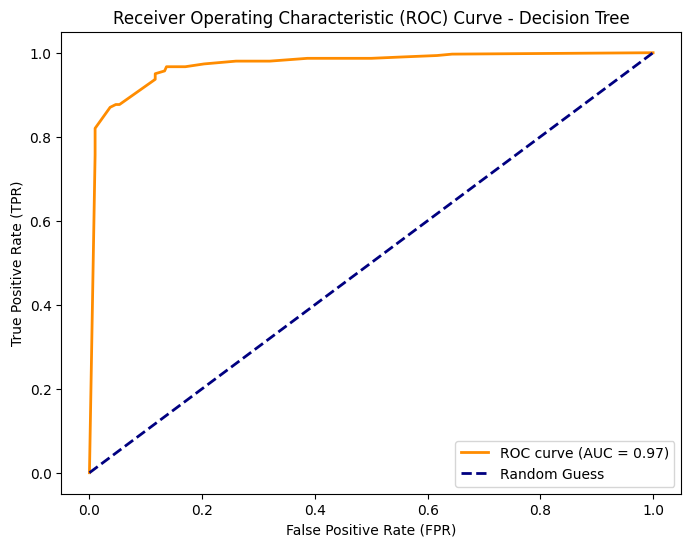

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve, auc

# Predict probabilities of class 1 on the test set
y_prob = tree.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend()
plt.show()

**Loss Curve for Decision Tree**

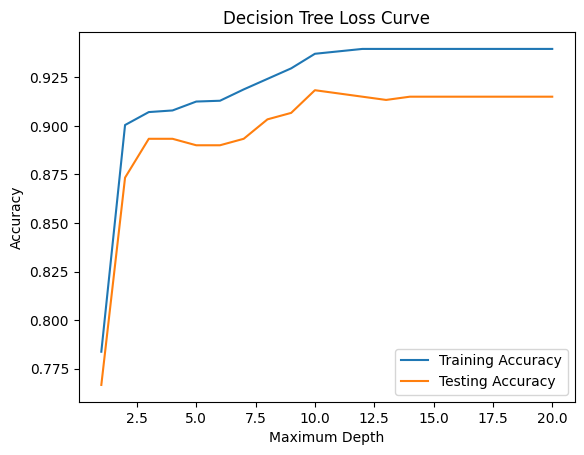

In [ ]:
# Initialize an empty list to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Define a range of maximum depths to test
max_depths = range(1, 21)

# Iterate over each maximum depth
for depth in max_depths:
    # Initialize the decision tree classifier with the current maximum depth
    tree1 = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Train the decision tree classifier
    tree1.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = tree1.predict(X_train)
    y_test_pred = tree1.predict(X_test)

    # Calculate training and testing accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the accuracy curve
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Testing Accuracy')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Loss Curve')
plt.legend()
plt.show()

**Confusion Matrix for Decision Tree**

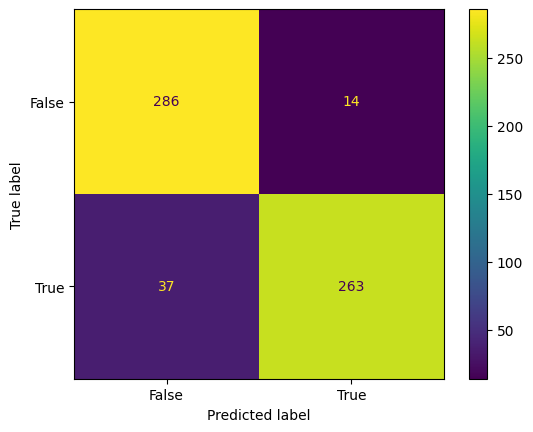

In [ ]:
#Confusion Matrix

confusion_matrix = confusion_matrix(y_test, y_test_tree)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### **4.2. Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(random_state = 12)

# fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=12)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)
f1_forest = f1_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print("F1-Score: {:.3f}".format(f1_forest))

Random forest: Accuracy on training Data: 0.940
Random forest: Accuracy on test Data: 0.918
F1-Score: 0.915


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest, f1_forest)

**ROC Curve for Random Forest:**

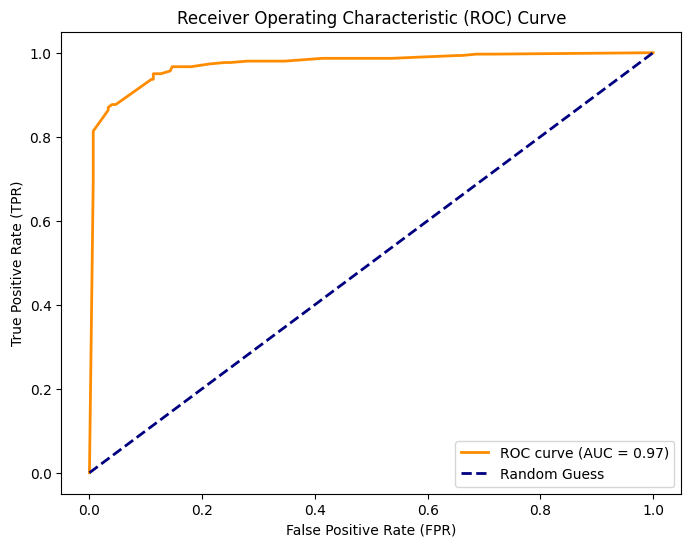

In [ ]:
# Predict probabilities of class 1 on the test set
y_prob = forest.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Loss Curve for Random Forest Tree**

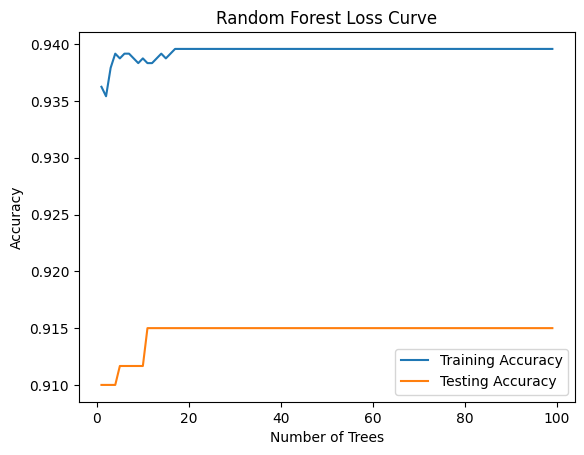

In [ ]:
# Initialize an empty list to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Define a range of number of trees to test
n_estimators_range = range(1, 100)

# Iterate over each number of trees
for n_estimators in n_estimators_range:
    # Initialize the Random Forest classifier with the current number of trees
    forest1 = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Train the Random Forest classifier
    forest1.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = forest1.predict(X_train)
    y_test_pred = forest1.predict(X_test)

    # Calculate training and testing accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the accuracy curve
plt.plot(n_estimators_range, train_accuracies, label='Training Accuracy')
plt.plot(n_estimators_range, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Loss Curve')
plt.legend()
plt.show()


**Confusion Matrix for Random Forest**

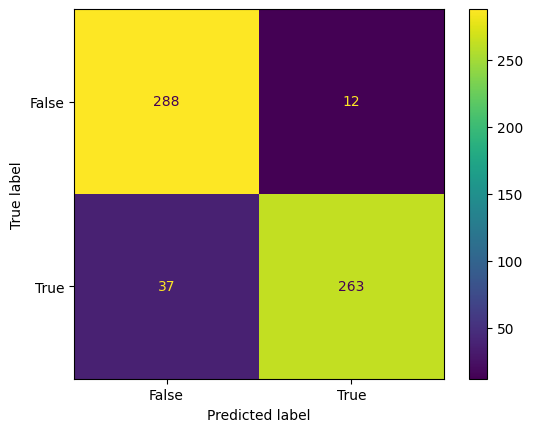

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, y_test_forest)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### **4.3. Logical Regression**
Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [ ]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# instantiate the model
clf = LogisticRegression(random_state = 2, verbose = True)

# fit the model
clf.fit(X_train, y_train)

LogisticRegression(random_state=2, verbose=True)

In [ ]:
#predicting the target value from the model for the samples
y_test_clf = clf.predict(X_test)
y_train_clf = clf.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_clf = accuracy_score(y_train,y_train_clf)
acc_test_clf = accuracy_score(y_test,y_test_clf)
f1_clf = f1_score(y_test,y_test_clf)

print("Logistic Regression: Accuracy on training Data: {:.3f}".format(acc_train_clf))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(acc_test_clf))
print("F1-Score: {:.3f}".format(f1_clf))

Logistic Regression: Accuracy on training Data: 0.903
Logistic Regression: Accuracy on test Data: 0.880
F1-Score: 0.864


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Logistic Regression', acc_train_clf, acc_test_clf, f1_clf)

**ROC Curve for Logestic Regression:**

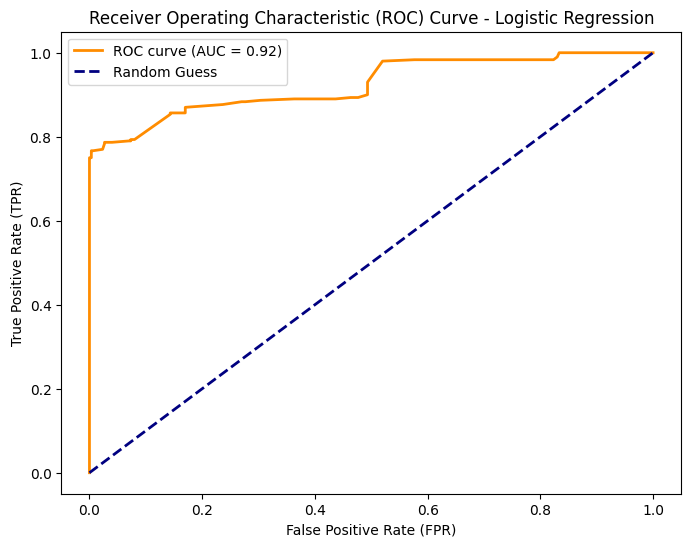

In [ ]:
# Predict probabilities of class 1 on the test set
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend()
plt.show()

**Loss Curve for Logistic Regression**

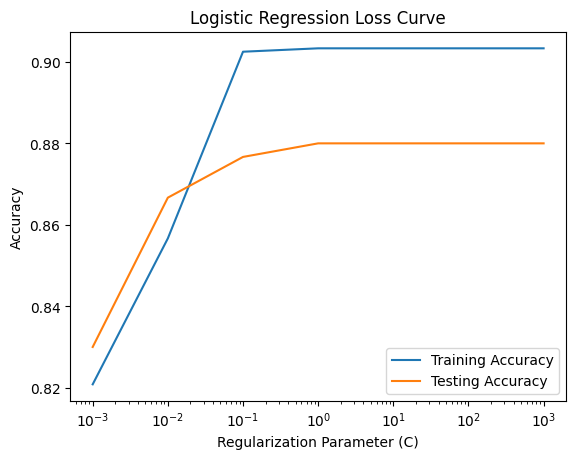

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize an empty list to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Define a range of regularization parameters to test
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Iterate over each regularization parameter
for C in C_values:
    # Initialize the logistic regression model with the current regularization parameter
    log_reg = LogisticRegression(C=C, random_state=42)

    # Train the logistic regression model
    log_reg.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = log_reg.predict(X_train)
    y_test_pred = log_reg.predict(X_test)

    # Calculate training and testing accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the accuracy curve
plt.plot(C_values, train_accuracies, label='Training Accuracy')
plt.plot(C_values, test_accuracies, label='Testing Accuracy')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Loss Curve')
plt.xscale('log')
plt.legend()
plt.show()


**Confusion Matrix for Logestic Regression**

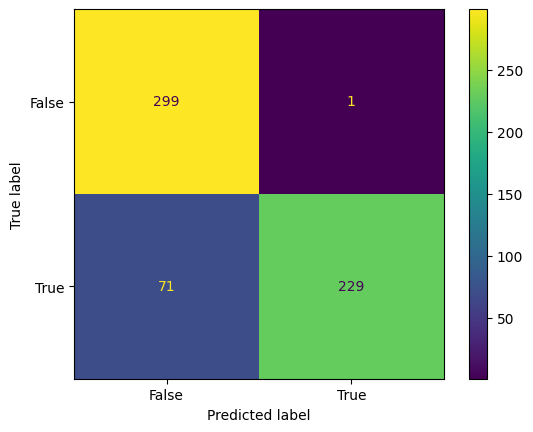

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, np.array(y_test_clf))

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### **4.4. LightGBM Classifier**
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [ ]:
#XGBoost Classification model
from lightgbm import LGBMClassifier
# instantiate the model
lgb = LGBMClassifier(random_state = 2)
#fit the model
lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1200, number of negative: 1200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=2)

In [ ]:
#predicting the target value from the model for the samples
y_test_lgb = lgb.predict(X_test)
y_train_lgb = lgb.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_lgb = accuracy_score(y_train,y_train_lgb)
acc_test_lgb = accuracy_score(y_test,y_test_lgb)
f1_lgb = f1_score(y_test,y_test_lgb)

print("LightGBM : Accuracy on training Data: {:.3f}".format(acc_train_lgb))
print("LightGBM : Accuracy on test Data: {:.3f}".format(acc_test_lgb))
print("F1-Score: {:.3f}".format(f1_lgb))

LightGBM : Accuracy on training Data: 0.937
LightGBM : Accuracy on test Data: 0.912
F1-Score: 0.908


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('LightGBM', acc_train_lgb, acc_test_lgb, f1_lgb)

**ROC Curve for LightGBM:**

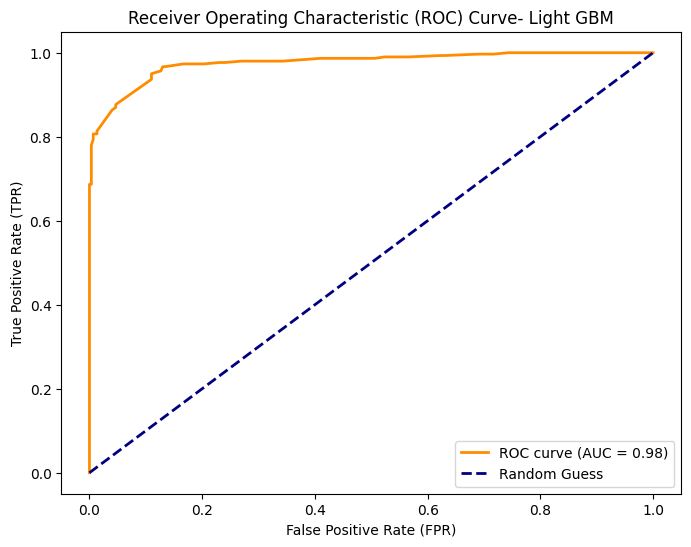

In [ ]:
# Predict probabilities of class 1 on the test set
y_prob = lgb.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve- Light GBM')
plt.legend()
plt.show()

**Accuracy Curve for Light GBM**

[LightGBM] [Info] Number of positive: 1200, number of negative: 1200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


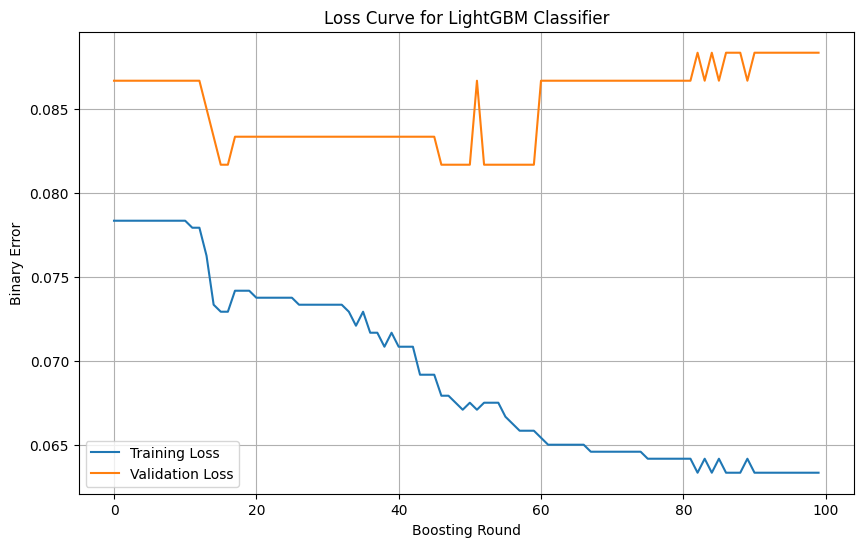

In [ ]:
import lightgbm as lgb
from sklearn.datasets import make_classification

# Initialize a LightGBM classifier
model = lgb.LGBMClassifier(objective='binary', metric='binary_error', boosting_type='gbdt')

# Train the LightGBM model
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='binary_error')

# Extract training and validation loss after each boosting round
train_loss = model.evals_result_['training']['binary_error']
valid_loss = model.evals_result_['valid_1']['binary_error']

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(valid_loss, label='Validation Loss')
plt.xlabel('Boosting Round')
plt.ylabel('Binary Error')
plt.title('Loss Curve for LightGBM Classifier')
plt.legend()
plt.grid(True)
plt.show()


**Confusion Matrix for Light GBM**

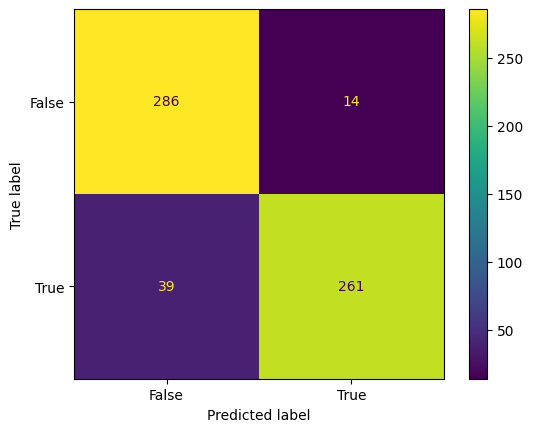

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_test_lgb)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### **4.5. Support Vector Machines**

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [ ]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12, probability= True)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=12)

In [ ]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)
f1_svm = f1_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))
print("F1-Score: {:.3f}".format(f1_svm))

SVM: Accuracy on training Data: 0.903
SVM : Accuracy on test Data: 0.875
F1-Score: 0.858


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm, f1_svm)

**ROC Curve for SVM:**

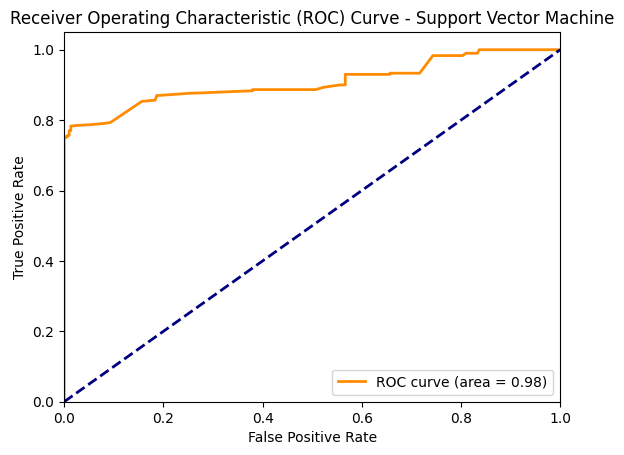

In [ ]:
# Calculate false positive rate, true positive rate, and thresholds
y_prob = svm.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Support Vector Machine')
plt.legend(loc="lower right")
plt.show()

**Loss Curve for SVM**

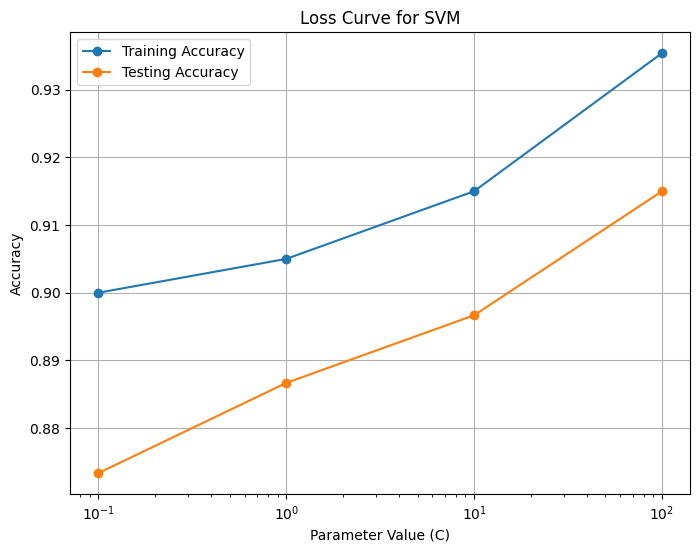

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC

# Define parameter values to iterate over (for example, C parameter in SVM)
param_values = [0.1, 1, 10, 100]

# Store accuracies
train_accuracies = []
test_accuracies = []

# Iterate over parameter values
for C in param_values:
    # Train SVM classifier with current parameter value
    svm = SVC(C=C)
    svm.fit(X_train, y_train)

    # Calculate training accuracy
    train_accuracy = svm.score(X_train, y_train)
    train_accuracies.append(train_accuracy)

    # Calculate testing accuracy
    test_accuracy = svm.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plot both training and testing accuracies
plt.figure(figsize=(8, 6))
plt.plot(param_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(param_values, test_accuracies, marker='o', label='Testing Accuracy')
plt.title('Loss Curve for SVM')
plt.xlabel('Parameter Value (C)')
plt.ylabel('Accuracy')
plt.xscale('log')  # Since parameter values are typically logarithmic
plt.grid(True)
plt.legend()
plt.show()


**Confusion Matrix for SVM**

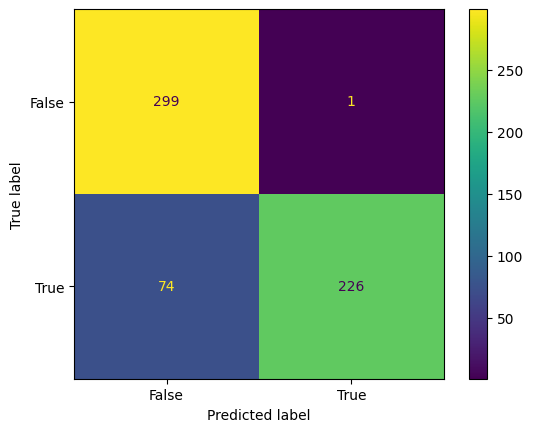

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_test_svm)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## **5. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'F1 Score':f1Score})

In [ ]:
results

,ML Model,Train Accuracy,Test Accuracy,F1 Score
0,Decision Tree,0.940,0.915,0.912
1,Random Forest,0.940,0.918,0.915
2,Logistic Regression,0.903,0.880,0.864
3,LightGBM,0.937,0.912,0.908
4,SVM,0.903,0.875,0.858


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy,F1 Score
1,Random Forest,0.940,0.918,0.915
0,Decision Tree,0.940,0.915,0.912
3,LightGBM,0.937,0.912,0.908
2,Logistic Regression,0.903,0.880,0.864
4,SVM,0.903,0.875,0.858


In [ ]:
#confusion matrix
#roc curve
#loss curve
#f1 score